# TITLE

## Import the libs and Load the datasets

In [56]:
# Import libraries

# Data Loading
import numpy as np
import pandas as pd

# Data Querying
import pandasql as ps

# Modelling
import statsmodels.formula.api as smf

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame> combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [58]:
def impute(data, value):
    """
    Function to impute a missing data (array-like) with a certain value
    
    :param data: array-like, the data with missing values
    :param value: float/int, the value to use for imputing missing values
    :return imputed_array: array-like, the imputed data
    """    
    # Check for each element in data 
    # return True if it's a missing values (represented as NaN in numpy) 
    # return False otherwise.
    bool_nan = np.isnan(data)
    
    # Return the value a_impute where a is missing and returns a otherwise
    imputed_data = np.where(bool_nan, value, data)
    
    return imputed_data

In [59]:
def simple_rand_impute(a):
    
    # Array containin boolearn, True if the element in a is missing, False otherwise
    missing = pd.isnull(a)
    
    # Number of missing value
    n_missing = sum(missing)
    
    # a observation that's not missing
    a_obs = a[~missing]
    
    # Copy of a
    imputed = a.copy()
    
    # Impute missing value with random observation that's not missing
    imputed[missing] = np.random.choice(a_obs, size=n_missing)
    
    return imputed

In [60]:
# Load dataset: Movie Titles
df_mv_titles = pd.read_csv("movie_titles.csv")
df_mv_titles.head()

,Title,Domestic,International,Budget,Distributor,MPAA-Rating,Runtime,Genres
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller


In [61]:
# Load dataset: Movie Daily Earnings
df_mv_daily_earnings = pd.read_csv("movie_daily_earnings.csv")
df_mv_daily_earnings.head()

,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1


## Check Missing Value

In [62]:
#Check missing value: Movie Titles
df_mv_titles.isnull().sum()/df_mv_titles.shape[0]*100

Title             0.000000
Domestic          0.000000
International     0.000000
Budget           32.147059
Distributor       0.029412
MPAA-Rating       4.588235
Runtime           0.000000
Genres            0.088235
dtype: float64

Movie Tiltes: variable(s) with missing value:
1. Budget (32%)
2. Distributor (0.03%)
3. MPAA-Rating (4.5%)
4. Genres (0.09%)

In [63]:
#Check missing value: Movie Daily Earnings
df_mv_daily_earnings.isnull().sum()/df_mv_daily_earnings.shape[0]*100

Movie_Title    0.000000
Date           0.000000
Daily          0.000000
Theaters       0.017319
Rank           0.000000
dtype: float64

Movie Daily Earnings: variable(s) with missing value:
1. Theaters (0.17%)

## Data Imputation

### Movie Daily Earnings Table

#### Standardize the table header

In [64]:
# Change the headers of the table
dict = {'Movie_Title': 'title',
        'Date': 'date',
        'Daily': 'daily',
        'Theaters': 'theaters',
        'Rank': 'rank'
        }
 
# Rename the headers based on the dict using rename () method
df_mv_daily_earnings.rename(columns=dict, inplace=True)
 

#### Handling Missing Values of Categotical Variables
We'll use simple random imputation to handle missing value of these categorical variables:
1. Theaters

In [65]:
# Fill the Theater's missing value using simple random imputation
df_mv_daily_earnings['imp_theaters'] = simple_rand_impute(df_mv_daily_earnings['theaters'])

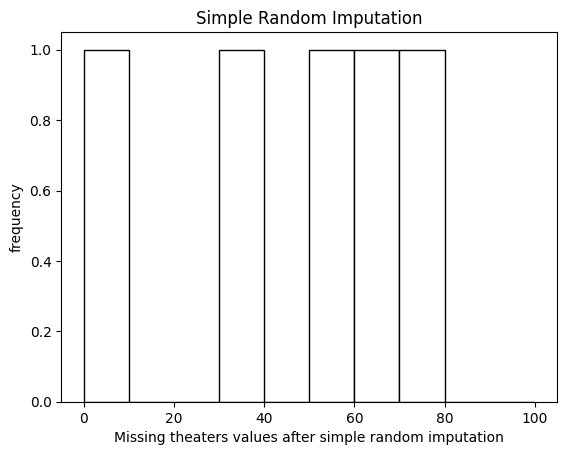

In [66]:
# Check the distribution of genres imputed values
# Store the genre imputed values df as a object
missing_theaters = df_mv_daily_earnings["theaters"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_daily_earnings_missing_theaters = df_mv_daily_earnings[missing_theaters][["theaters","imp_theaters"]].copy()

# Plot the imputed distributor value as a bar chart
plt.hist(df_mv_daily_earnings_missing_theaters["imp_theaters"], bins = np.arange(0, 101, 10), color='white', edgecolor='black')
plt.xlabel('Missing theaters values after simple random imputation')
plt.ylabel('frequency')
plt.title('Simple Random Imputation')
plt.show()


In [67]:
# # Fill the Theater's missing value using the mode
# df_mv_daily_earnings['Theaters'].fillna(df_mv_daily_earnings['Theaters'].mode()[0], inplace=True)


In [68]:
#Check the missing value again: Movie Daily Earnings
df_mv_daily_earnings.isnull().sum()/df_mv_daily_earnings.shape[0]*100

title           0.000000
date            0.000000
daily           0.000000
theaters        0.017319
rank            0.000000
imp_theaters    0.000000
dtype: float64

Note: No longer any missing value in Movie Daily Earnings dataset

### Movie Titles Table

#### Standardize the table header

In [69]:
# Change the headers of the table
dict = {'Title': 'title',
        'Domestic': 'domestic',
        'International': 'international',
        'Budget': 'budget',
        'Distributor': 'distributor',
        'MPAA-Rating': 'mpaa_rating',
        'Runtime': 'runtime',
        'Genres': 'genres'
        }
 
# Rename the headers based on the dict using rename () method
df_mv_titles.rename(columns=dict, inplace=True)
 

#### Handling Missing Values of Categotical Variables

We'll use mode-imputation to handle missing value of these categorical variables:
1. Distributor
2. MPAA-Rating
3. Genres

In [70]:
# Fill these missing value using simple random imputation
df_mv_titles['imp_distributor'] = simple_rand_impute(df_mv_titles['distributor'])
df_mv_titles['imp_genres'] = simple_rand_impute(df_mv_titles['genres'])
df_mv_titles['imp_mpaa_rating'] = simple_rand_impute(df_mv_titles['mpaa_rating'])

In [71]:
# # Fill the Distributor's missing value using the mode
# df_mv_titles['distributor'].fillna(df_mv_titles['distributor'].mode()[0], inplace=True)
# df_mv_titles['mpaa_rating'].fillna(df_mv_titles['mpaa_rating'].mode()[0], inplace=True)
# df_mv_titles['genres'].fillna(df_mv_titles['genres'].mode()[0], inplace=True)

<Axes: xlabel='imp_distributor'>

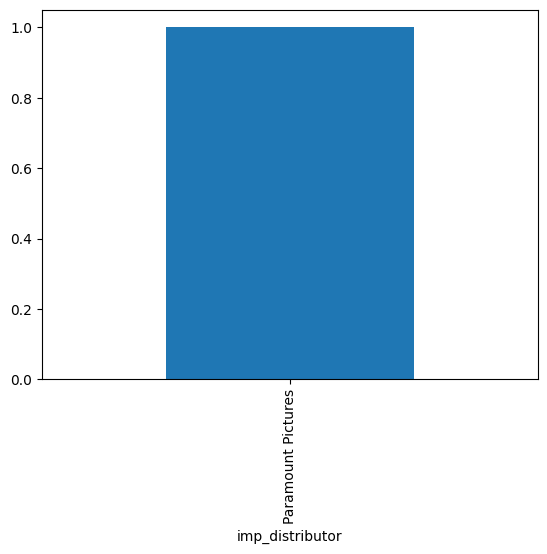

In [72]:
# Check the distribution of distributor imputed values
# Store the distributor imputed values df as a object
missing_distributor = df_mv_titles["distributor"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_titles_missing_distibutor = df_mv_titles[missing_distributor][["distributor","imp_distributor"]].copy()

# Plot the imputed distributor value as bar chart
df_mv_titles_missing_distibutor['imp_distributor'].value_counts().plot(kind='bar')

<Axes: xlabel='imp_genres'>

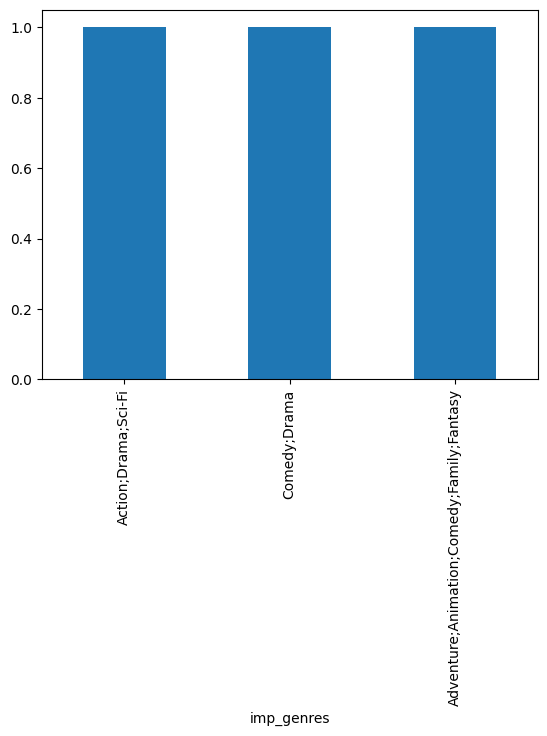

In [73]:
# Check the distribution of genres imputed values
# Store the genre imputed values df as a object
missing_genres = df_mv_titles["genres"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_titles_missing_genres = df_mv_titles[missing_genres][["genres","imp_genres"]].copy()

# Plot the imputed distributor value as a bar chart
df_mv_titles_missing_genres['imp_genres'].value_counts().plot(kind='bar')

<Axes: xlabel='imp_mpaa_rating'>

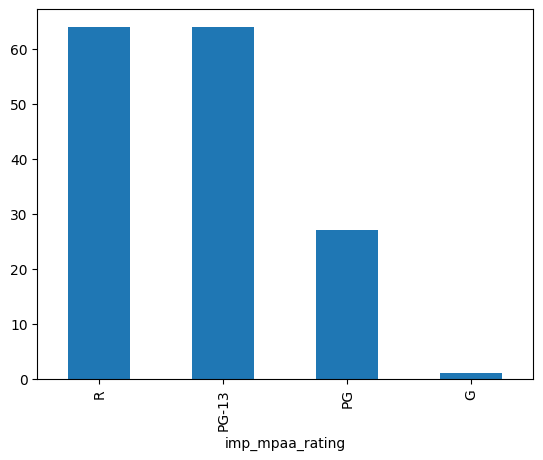

In [74]:
# Check the distribution of mpaa_rating imputed values
# Store the mpaa_rating imputed values df as a object
missing_mpaa_rating = df_mv_titles["mpaa_rating"].isnull()

# Create a new dataframe consisting only distributor column with missing values and the imputed value counterpart
df_mv_titles_missing_mpaa_rating = df_mv_titles[missing_mpaa_rating][["mpaa_rating","imp_mpaa_rating"]].copy()

# Plot the imputed distributor value as a bar chart
df_mv_titles_missing_mpaa_rating['imp_mpaa_rating'].value_counts().plot(kind='bar')

In [75]:
#Check again the missing value: Movie Titles
df_mv_titles.isnull().sum()/df_mv_titles.shape[0]*100

title               0.000000
domestic            0.000000
international       0.000000
budget             32.147059
distributor         0.029412
mpaa_rating         4.588235
runtime             0.000000
genres              0.088235
imp_distributor     0.000000
imp_genres          0.000000
imp_mpaa_rating     0.000000
dtype: float64

Note: There's no longer any missing value in those categorical variables.

#### Handling Missing Values of Numerical Variable

There's one numerical variable with missing values:
1. Budget

We'll use these imputation methods to handle the missing value and find which method perform the best.
1. Complete Case Analysis
2. Deterministic Regression Imputation
3. Random Regression Imputation

##### 1. Complete Case Analysis

**Evaluate the dataset shape**

In [76]:
# Check the size of our original data
df_mv_titles.shape

(3400, 11)

In [77]:
# Drop all rows that contain missing data
df_mv_titles_compl_case = df_mv_titles.dropna(axis = 0)

# Check the size of data after row deletion
df_mv_titles_compl_case.shape

(2257, 11)

- We get that the table contains 2307 rows of complete data
- We'll build a regression model based on this complete data and evaluation it

In [78]:
df_mv_titles_compl_case.head()

,title,domestic,international,budget,distributor,mpaa_rating,runtime,genres,imp_distributor,imp_genres,imp_mpaa_rating
0,Jurassic World (2015),652270625,1018130012,150000000.0,Universal Pictures,PG-13,124,Action;Adventure;Sci-Fi,Universal Pictures,Action;Adventure;Sci-Fi,PG-13
1,Star Wars: Episode VII - The Force Awakens (2015),936662225,1131561399,245000000.0,Walt Disney Studios Motion Pictures,PG-13,138,Action;Adventure;Sci-Fi,Walt Disney Studios Motion Pictures,Action;Adventure;Sci-Fi,PG-13
2,Avengers: Age of Ultron (2015),459005868,943800000,250000000.0,Walt Disney Studios Motion Pictures,PG-13,141,Action;Adventure;Sci-Fi,Walt Disney Studios Motion Pictures,Action;Adventure;Sci-Fi,PG-13
3,Inside Out (2015),356461711,501149463,175000000.0,Walt Disney Studios Motion Pictures,PG,95,Adventure;Animation;Comedy;Drama;Family;Fantasy,Walt Disney Studios Motion Pictures,Adventure;Animation;Comedy;Drama;Family;Fantasy,PG
4,Furious 7 (2015),353007020,1162040651,190000000.0,Universal Pictures,PG-13,137,Action;Adventure;Thriller,Universal Pictures,Action;Adventure;Thriller,PG-13


**Build the regression model**

In [79]:
# # Create the OLS model object and fit the model
# model_cca = smf.ols("budget ~ domestic + international + C(distributor) \
#                                 + C(mpaa_rating) + runtime \
#                                 + C(genres)", df_mv_titles_compl_case).fit()

In [80]:
# Create the OLS model object and fit the model: without the categorical variable
model_cca = smf.ols("budget ~ domestic + international + runtime", df_mv_titles_compl_case).fit()

Note: Distributor, MPAA-Rating, and Genres variables are not included because these variables can't be used in other imputation methods. Thus, we can't compare the models' standard error of these variables.

**Evaluate the model and store the evaluation**

In [81]:
r_squared = pd.DataFrame({"rsquared_cca" : [model_cca.rsquared]})
standard_error = pd.DataFrame({"standard_error_cca" : model_cca.bse})

In [82]:
r_squared

,rsquared_cca
0,0.542161


In [83]:
standard_error

,standard_error_cca
Intercept,4.561579e+06
domestic,1.682462e-02
international,9.220469e-03
runtime,4.227784e+04


##### 2. Deterministic Regression Imputation

In [84]:
# Check the percentage of missing value
df_mv_titles.isnull().sum()/df_mv_titles.shape[0]*100

title               0.000000
domestic            0.000000
international       0.000000
budget             32.147059
distributor         0.029412
mpaa_rating         4.588235
runtime             0.000000
genres              0.088235
imp_distributor     0.000000
imp_genres          0.000000
imp_mpaa_rating     0.000000
dtype: float64

We will only use the 68% of the data where all variables is complete as the predictors

In [85]:
# Exclude earning missing cases
df_mv_titles_det = df_mv_titles.dropna(subset=['budget'])

In [86]:
# Check percentage missing value in deterministic dataset
df_mv_titles_det.isnull().sum()/df_mv_titles_det.shape[0]*100

title              0.000000
domestic           0.000000
international      0.000000
budget             0.000000
distributor        0.000000
mpaa_rating        2.167317
runtime            0.000000
genres             0.000000
imp_distributor    0.000000
imp_genres         0.000000
imp_mpaa_rating    0.000000
dtype: float64

**Build a regression model using the complete dataset**

In [87]:
# Create the OLS model object and fit the model
model_imputation_reg = smf.ols("budget ~ domestic + international + runtime", df_mv_titles_det).fit()

Note: Distributor, MPAA-Rating, and Genres variables are not included because there's a value that only exist in the missing row. Thus, there will be and error when we try to predict the target variable.

**Prediction the missing budget variables using the model and impute the result to the missing values**

In [88]:
## Create a predictors dataframe by removing the budget column
df_mv_titles_predictors = df_mv_titles.drop(columns=["budget"])

In [89]:
# Predict the budget using the deterministic model
pred_budget_det = model_imputation_reg.predict(df_mv_titles_predictors)

**Impute the predicted values**

In [90]:
# Impute the budget variables
# Store the complete earnings that imuputed by deterministic value from regression prediction in a new variable

df_mv_titles["imp_budget_det_reg"] = impute(df_mv_titles['budget'], pred_budget_det)

In [91]:
df_mv_titles.isna().sum()

title                    0
domestic                 0
international            0
budget                1093
distributor              1
mpaa_rating            156
runtime                  0
genres                   3
imp_distributor          0
imp_genres               0
imp_mpaa_rating          0
imp_budget_det_reg       0
dtype: int64

- `imp_budget_det_reg` has 0 missing data
- We'll build a regression model using that imputed variable and then evaluate the performance

**Build a regression model using the imputed budget variable**

In [92]:
# Create the OLS model object and fit the model
model_det_reg = smf.ols("imp_budget_det_reg ~ domestic + international + runtime", df_mv_titles).fit()

**Evaluate the model and store the evaluation**

In [93]:

r_squared["rsquared_det_reg"] = model_det_reg.rsquared
standard_error["standard_error_det_reg"] = model_det_reg.bse

In [94]:
r_squared

,rsquared_cca,rsquared_det_reg
0,0.542161,0.591674


In [95]:
standard_error

,standard_error_cca,standard_error_det_reg
Intercept,4.561579e+06,2.952277e+06
domestic,1.682462e-02,1.170837e-02
international,9.220469e-03,6.529237e-03
runtime,4.227784e+04,2.737619e+04


##### 3. Random Regression Imputation

In [96]:
# residual standard deviation
sigma = np.sqrt(model_imputation_reg.mse_resid)

print(f"estimated residual standard deviation from the model: {np.round(sigma,1)}")

estimated residual standard deviation from the model: 35030280.5


**Store each random prediction error in a normal distribution**

In [97]:
np.random.seed(1)

error = np.random.normal(0, sigma, len(df_mv_titles_predictors))

**Predict the missing budget variables using the model and the randomized error and then impute the predicted values**

In [98]:
# Predict the values using the model and the error
pred_budget_rand_reg = model_imputation_reg.predict(df_mv_titles_predictors) + error

# Impute missing earning with prediction results
df_mv_titles["imp_budget_rand_reg"] = impute(df_mv_titles['budget'], pred_budget_rand_reg)

In [99]:
# Check total missing data where earnings are imputed and stored in `imp_earnings_rand_reg`

df_mv_titles.isna().sum()

title                     0
domestic                  0
international             0
budget                 1093
distributor               1
mpaa_rating             156
runtime                   0
genres                    3
imp_distributor           0
imp_genres                0
imp_mpaa_rating           0
imp_budget_det_reg        0
imp_budget_rand_reg       0
dtype: int64

- `imp_budget_rand_reg` has 0 missing data
- We'll then build a regression model based on that imputed budget values

**Build regression model**

In [100]:
# Create the OLS model object and fit the model
model_rand_reg = smf.ols("imp_budget_rand_reg ~ domestic + international + runtime", df_mv_titles).fit()

**Evaluate the model and store the evaluation**

In [101]:

r_squared["rsquared_rand_reg"] = model_rand_reg.rsquared
standard_error["standard_error_rand_reg"] = model_rand_reg.bse

In [102]:
r_squared

,rsquared_cca,rsquared_det_reg,rsquared_rand_reg
0,0.542161,0.591674,0.493344


In [103]:
standard_error

,standard_error_cca,standard_error_det_reg,standard_error_rand_reg
Intercept,4.561579e+06,2.952277e+06,3.578436e+06
domestic,1.682462e-02,1.170837e-02,1.419164e-02
international,9.220469e-03,6.529237e-03,7.914048e-03
runtime,4.227784e+04,2.737619e+04,3.318251e+04


**Decision:** we'll use the budget variable imputed using deterministic regression for our analysis since it has the largest r-squared score and smallest standard error.

## Join the Tables using Pandasql

In [104]:
query_join_movie_tables = """
SELECT
    (mvt.domestic + mvt.international)/1000000 AS total_earn_mio,
    CAST(mvt.international AS REAL) * 100 /(CAST(mvt.domestic AS REAL) + CAST(mvt.international AS REAL)) AS int_earn_perc,
    mvt.imp_budget_det_reg/1000000 AS budget_mio,
    mvt.runtime AS runtime_min,
    COUNT(DISTINCT mvde.date) AS days_in_theater,
    SUM(CASE WHEN mvde.rank <= 5 THEN 1 ELSE 0 END) as days_top_5,
    ROUND(AVG(mvde.theaters),0) AS daily_n_theaters
FROM
    df_mv_titles AS mvt
JOIN
    df_mv_daily_earnings AS mvde
ON
    mvt.title = mvde.title
GROUP BY mvt.title
"""

df_mv_joined = ps.sqldf(query_join_movie_tables, locals())
df_mv_joined

,total_earn_mio,int_earn_perc,budget_mio,runtime_min,days_in_theater,days_top_5,daily_n_theaters
0,110,34.599019,41.296258,103,84,14,1395.0
1,269,64.866660,105.000000,109,105,21,1329.0
2,183,63.533370,85.000000,100,38,24,2381.0
3,17,29.198708,32.458614,108,56,0,818.0
4,67,32.069445,47.497801,130,70,7,1271.0
...,...,...,...,...,...,...,...
3395,1023,66.665998,180.738954,108,154,60,1760.0
3396,277,48.779884,70.000000,124,72,35,2325.0
3397,346,87.028014,85.000000,107,56,7,1473.0
3398,71,62.161485,37.705645,101,32,7,2372.0


## Create Scatter Matrix

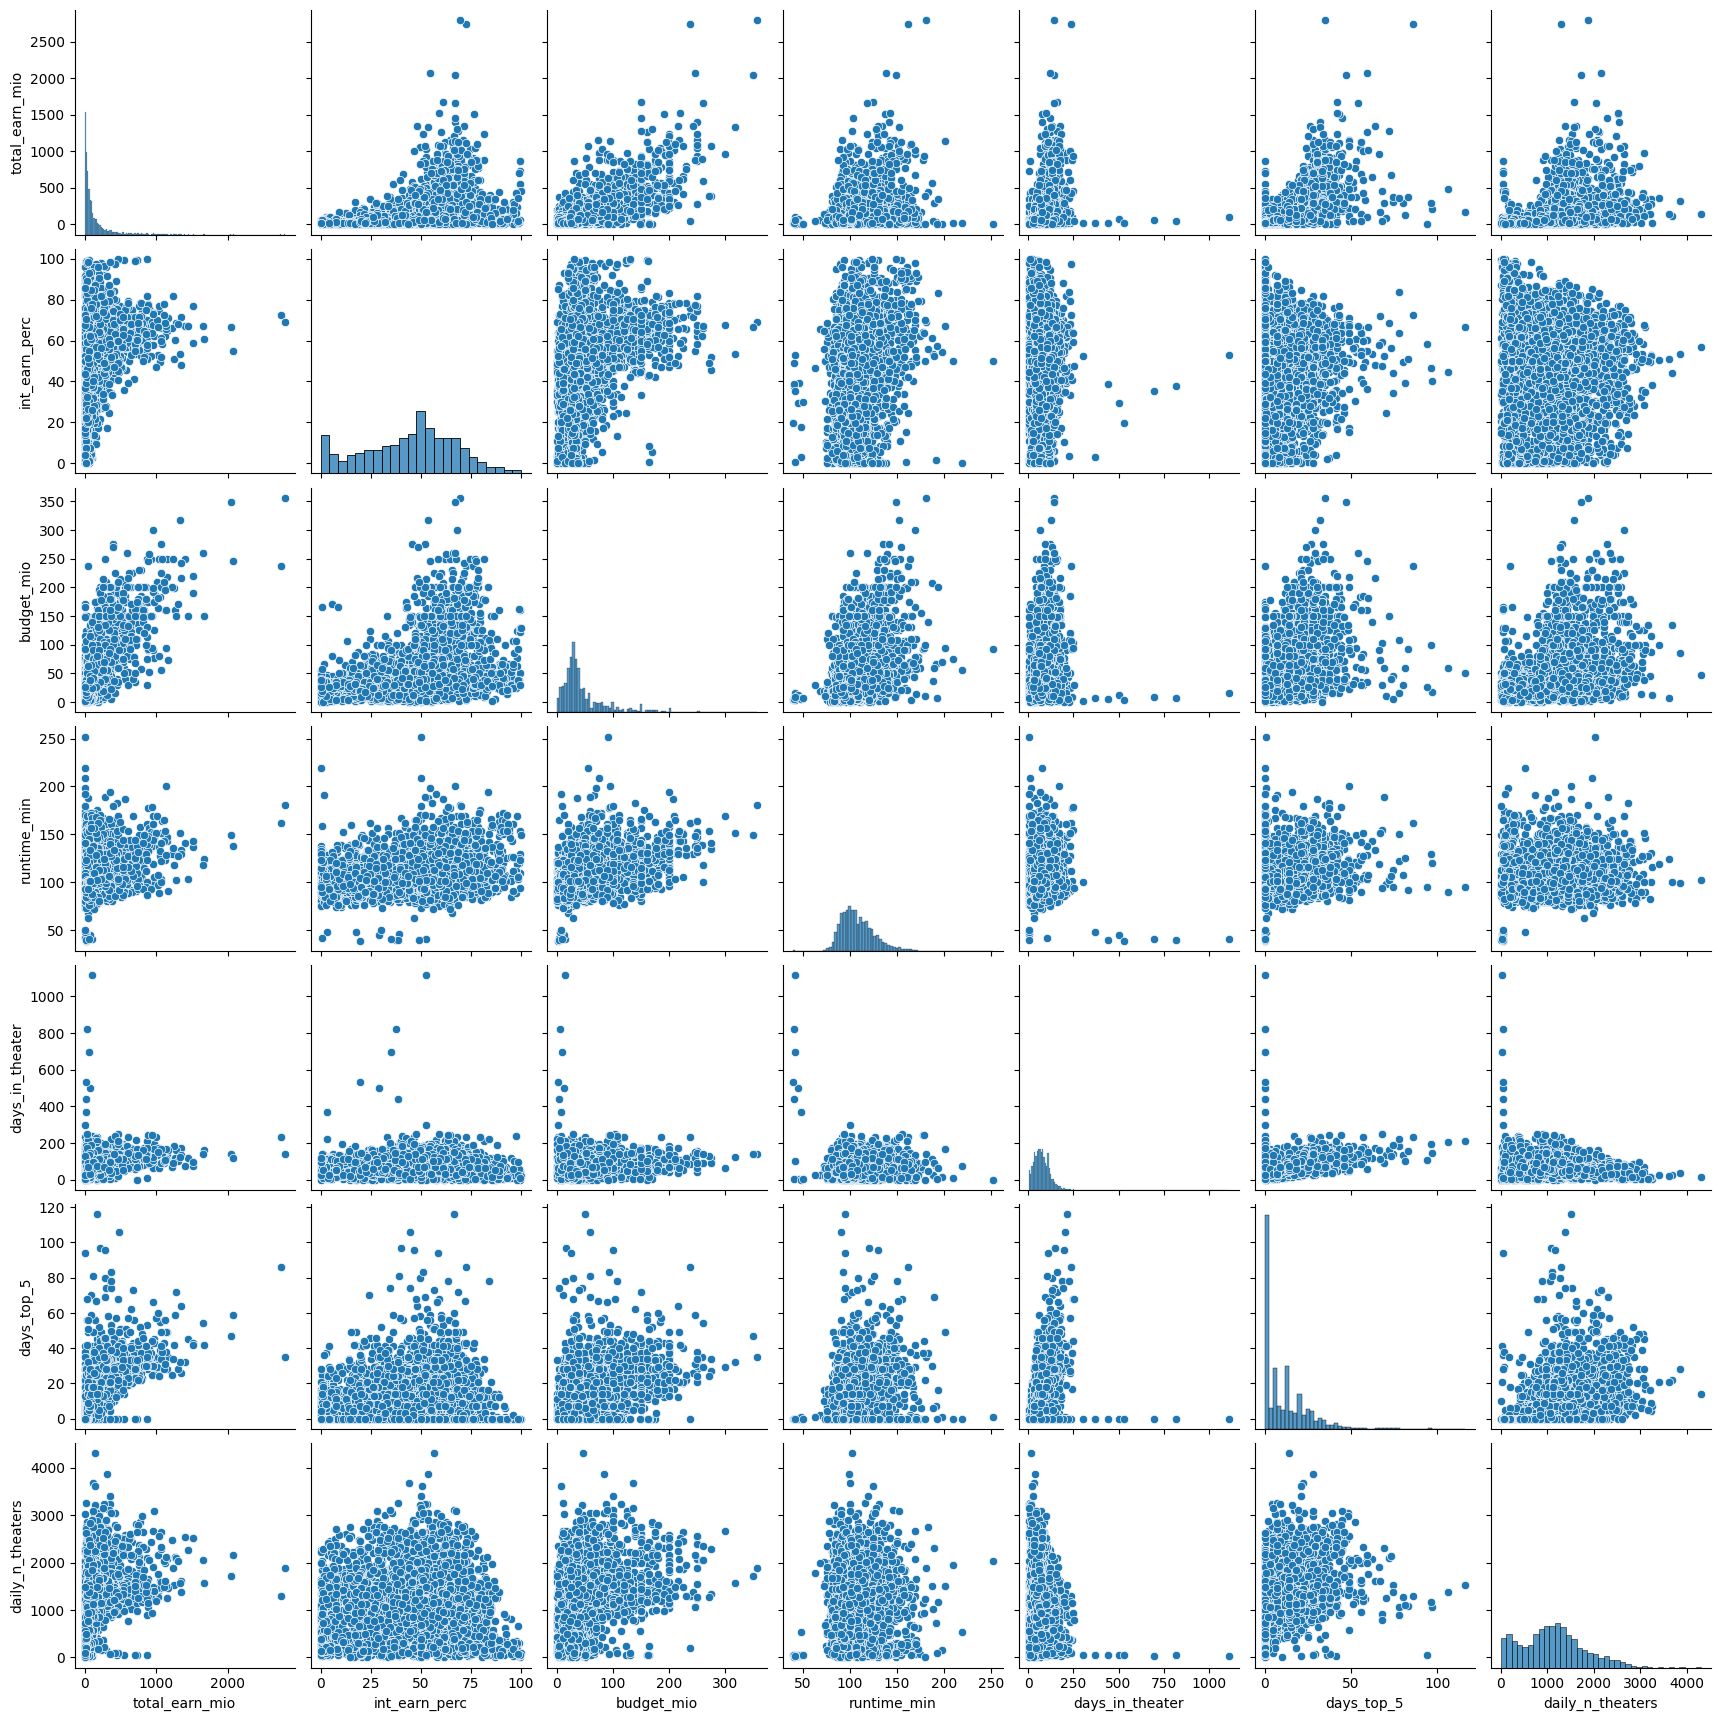

In [105]:
# Create scatter matrix
sns.pairplot(df_mv_joined)

**Note:** based on this scatter matrix, we'll deep dive on predicting the total earning using the other variables

In [111]:
# Create OLS model object
model = smf.ols("total_earn_mio ~ budget_mio \
                + int_earn_perc + runtime_min \
                + days_in_theater + days_top_5 \
                + daily_n_theaters", df_mv_joined)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
print_coef_std_err(results)

,coef,std err
Intercept,-144.782392,14.634785
budget_mio,2.483888,0.060174
int_earn_perc,0.820856,0.100018
runtime_min,0.070375,0.120567
days_in_theater,0.502024,0.049444
days_top_5,5.417082,0.221367
daily_n_theaters,0.012527,0.004107


In [112]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_earn_mio   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1260.
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:31:52   Log-Likelihood:                -21101.
No. Observations:                3400   AIC:                         4.222e+04
Df Residuals:                    3393   BIC:                         4.226e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -144.7824     14.635     -9.893      0.000    -173.476    -116.089
budget_mio           2.4839      0.060     41.278      0.000       2.366       2.602
int_earn_perc        0.8209      0.100      8.207      0.000       0.625       1.017
runtime_min          0.0704      0.121      0.584      0.559      -0.166       0.307
days_in_theater      0.5020      0.049     10.153      0.000       0.405       0.599
days_top_5           5.4171      0.221     24.471      0.000       4.983       5.851
daily_n_theaters     0.0125      0.004      3.050      0.002       0.004       0.021
==============================================================================
Omnibus:                     2624.279   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164805.465
Skew:                           3.129   Prob(JB):                         0.00
Kurtosis:                      36.529   Cond. No.                     9.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note: based on this we can remove runtime variable from the calculation since there's no significant relationship between them

In [113]:
# Create OLS model object
model = smf.ols("total_earn_mio ~ budget_mio \
                + int_earn_perc + days_in_theater + days_top_5 \
                + daily_n_theaters", df_mv_joined)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
print_coef_std_err(results)

,coef,std err
Intercept,-137.312923,7.099941
budget_mio,2.495049,0.057050
int_earn_perc,0.825560,0.099683
days_in_theater,0.498304,0.049027
days_top_5,5.433255,0.219604
daily_n_theaters,0.012090,0.004038


In [114]:
results.rsquared

0.6901872735716215

- The model is quite good. It is able to explain 70% variance of the total earnings.
- The standard errors are relatively low with days_top_5 with the highest standard error. 
- But the intercept is not quite intuitive and need to be standardized by centering it.

**Coefficient Interpretation**

- The `intercept`, `-$137mio` is the total earning for a movie, that has 0 budget, 0 international earning percentage, 0 days in theaters, 0 days as a top 5 movie, and 0 theaters showing it daily.
- The coefficient of `budget_mio`, the predictive difference comparing two movies that have same other variables but differ in 1 million in budget is `$2.4mio`
- The coefficient of `days_top_5`, the predictive difference comparing two movies that have same other variables but differ in 1 day as a top 5 movie is `$5.4mio`

## Standardize the Model

**Centering the model for more meaningful interpretation**

- We can center the predictors value by subtracting each value by its mean.

In [123]:
# Find the mean of each predictor
budget_mean = df_mv_joined['budget_mio'].mean()
int_earn_perc_mean = df_mv_joined['int_earn_perc'].mean()
days_in_theater_mean = df_mv_joined['days_in_theater'].mean()
days_top_5_mean = df_mv_joined['days_top_5'].mean()
daily_n_theaters_mean = df_mv_joined['daily_n_theaters'].mean()


In [124]:
# Centering the predictors by subtracting it with its mean
df_mv_joined['budget_mio_cent'] = df_mv_joined['budget_mio'] - budget_mean
df_mv_joined['int_earn_perc_cent'] = df_mv_joined['int_earn_perc'] - int_earn_perc_mean
df_mv_joined['days_in_theater_cent'] = df_mv_joined['days_in_theater'] - days_in_theater_mean
df_mv_joined['days_top_5_cent'] = df_mv_joined['days_top_5'] - days_top_5_mean
df_mv_joined['daily_n_theaters_cent'] = df_mv_joined['daily_n_theaters'] - daily_n_theaters_mean


Then, build the regression use variables that denote salary in thousand dollars, performance score w.r.t 'Fully Meets', Satisfaction score w.r.t the median, 3 and Standardized gender variable

In [125]:
# Create OLS model object
model = smf.ols("total_earn_mio ~ budget_mio_cent \
                + int_earn_perc_cent + days_in_theater_cent + days_top_5_cent \
                + daily_n_theaters_cent", df_mv_joined)

# Fit the model
results_standardized_model = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
print_coef_std_err(results_standardized_model)

,coef,std err
Intercept,134.951176,2.059421
budget_mio_cent,2.495049,0.057050
int_earn_perc_cent,0.825560,0.099683
days_in_theater_cent,0.498304,0.049027
days_top_5_cent,5.433255,0.219604
daily_n_theaters_cent,0.012090,0.004038


In [126]:
results_standardized_model.rsquared

0.6901872735716211

In [137]:
print("Mean budget (million USD):", round(budget_mean),2)
print("Mean international earnings percentage (%):", round(int_earn_perc_mean),2)
print("Mean number of days in theater:", round(days_in_theater_mean),0)
print("Mean number of days as a top 5 movie:", round(days_in_theater_mean),0)
print("Number of theaters playing the movie in a day:", round(daily_n_theaters_mean, 0))

Mean budget (million USD): 49 2
Mean international earnings percentage (%): 44 2
Mean number of days in theater: 75 0
Mean number of days as a top 5 movie: 75 0
Number of theaters playing the movie in a day: 1124.0


Here is **the final interpretation** of the model that tells us the relationship between budget, international earning percentage, number of days in theater, number of days as a top 5 movie, and number of theaters showing the movie in a day:
- The `intercept`, `49 million USD`, is the average revenue accross the movies that have average budget, international earning percentage, number of days in theater, number of days as a top 5 movie, and number of theaters playing the movie in a day.
- The coefficient of `budget_mio_cent`, which is `$2.49 million USD.`, is the predictive difference comparing two movies that differ 1 million USD in budget but have average values in all other predictors.
- The coefficient of `int_earn_perc_cent`, which is `$0.82 million USD.`, is the predictive difference comparing two movies that differ 1 percent in their percentage of international revenue but have average values in all other predictors.
- The coefficient of `days_in_theater_cent`, which is `$0.49 million USD.`, is the predictive difference comparing two movies that differ 1 day in their bumber of days in theater but have average values in all other predictors.
- The coefficient of `days_top_5_cent`, which is `$5.43 million USD.`, is the predictive difference comparing two movies that differ 1 day in their bumber of days as a top 5 movie but have average values in all other predictors.
- The coefficient of `daily_n_theaters_cent`, which is `$0.01 million USD.`, is the predictive difference comparing two movies that differ 1 theater that's playing the movie daiy but have average values in all other predictors.